<a href="https://colab.research.google.com/github/shanOnline99/Machine-Learning/blob/main/Assignment2_2019e107.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 2
EC9630: Machine Learning
Chapter 4: Linear Regression
2019/E/107

1. Use Boston housing data for this assignment. Load the data and extract
the feature matrix and target vector separately.

In [ ]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
data = pd.read_csv(url, delimiter='\s+', header=None)

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


2. Use the Person correlation to
nd the correlation between features.
Draw the heatmap to show this correlation.

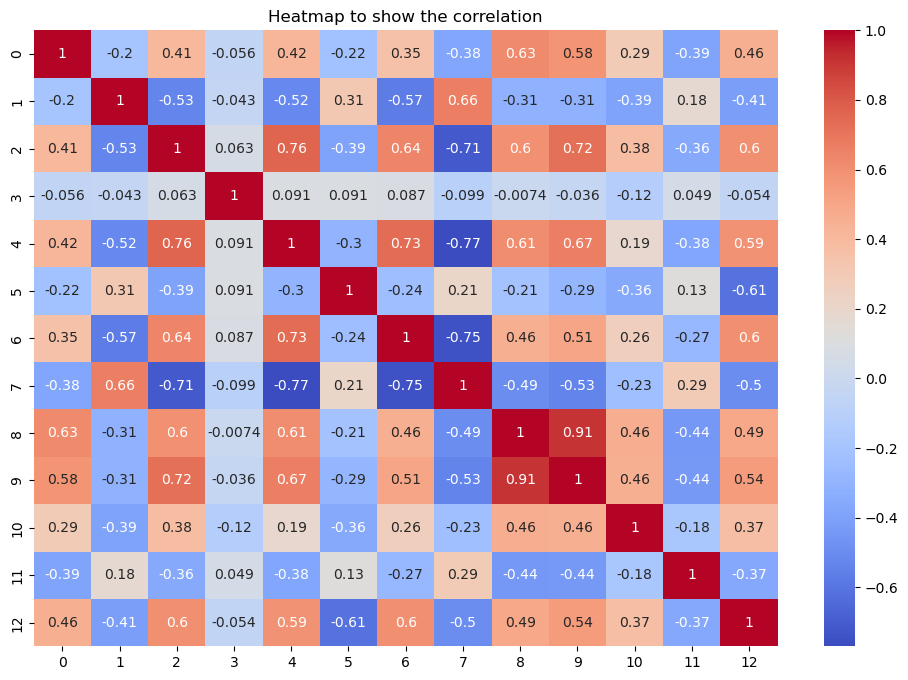

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

X = dataset.iloc[:, :-1]

correlation_matrix = X.corr(method='pearson')
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap to show the correlation")
plt.show()

3. Extract the correlation of all variables with the target variable.

In [ ]:
correlation_allvariable = X.apply(lambda col: col.corr(y))
print(correlation_allvariable)

0    -0.388305
1     0.360445
2    -0.483725
3     0.175260
4    -0.427321
5     0.695360
6    -0.376955
7     0.249929
8    -0.381626
9    -0.468536
10   -0.507787
11    0.333461
12   -0.737663
dtype: float64


4. Display the first three features with high correlation and state the
threshold value for this selection.

In [ ]:
correlation_allvariable = X.apply(lambda col: col.corr(y))
sorted_correlation = correlation_allvariable.sort_values(ascending=False)

threshold = 0.6

high_corr_features = sorted_correlation[sorted_correlation > threshold]

print("Features with high correlation to the target variable:")
for feature, corr in high_corr_features[:3].items():
    print(f"{feature}: {corr}")


Features with high correlation to the target variable:
5: 0.695359947071539


5. Now use Lasso regression and 2nd the number of selected and elimi-
nated variables.

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(X, y)

selected_v = np.sum(lasso.coef_ != 0)
eliminated_v = np.sum(lasso.coef_ == 0)

print("Number of selected variables:")
print(selected_v)
print("Number of eliminated variables:")
print(eliminated_v)


Number of selected variables:
10
Number of eliminated variables:
3


6. Find the importance of each feature and plot the values using a bar
graph.

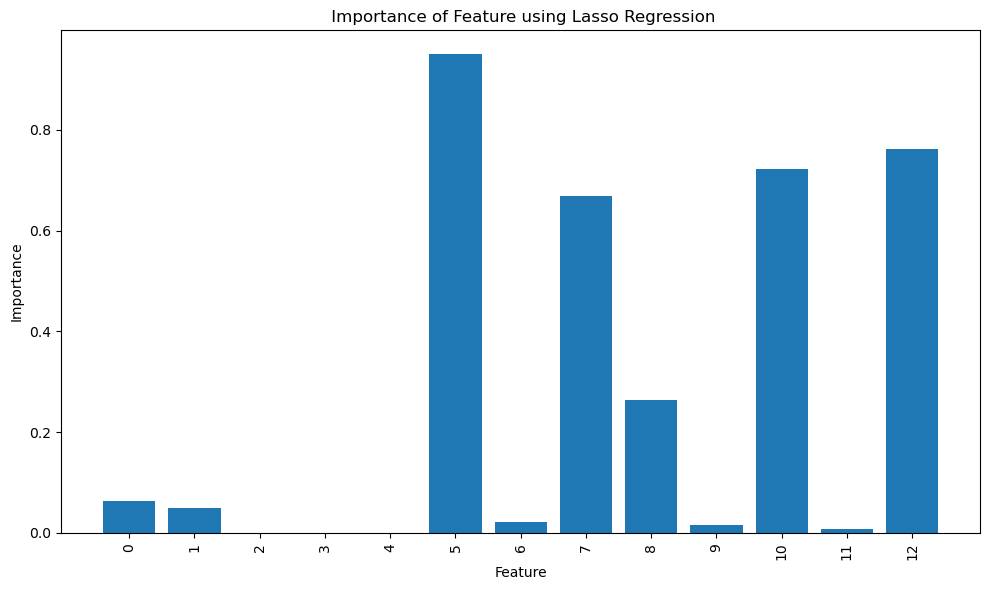

In [ ]:
importance = np.abs(lasso.coef_)

plt.figure(figsize=(10, 6))
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X.columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title(' Importance of Feature using Lasso Regression')
plt.tight_layout()
plt.show()